# 사기탐지
* 사기탐지 데이터의 특징 : 클래스 불균형이 매우 심함
* 모델을 훈련시킬 수 있는 데이터가 매우 적다
* 모델 성능을 올리기 위해서 데이터 증폭, 축소를 통한 클래스 불균형을 해결하고
* 모델을 만드는 것이 중요

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib


In [2]:
data = pd.read_csv('./data/creditcard.csv')
data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [3]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
data.groupby('Class')['Amount'].describe()

count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87

<Axes: xlabel='Amount', ylabel='Count'>

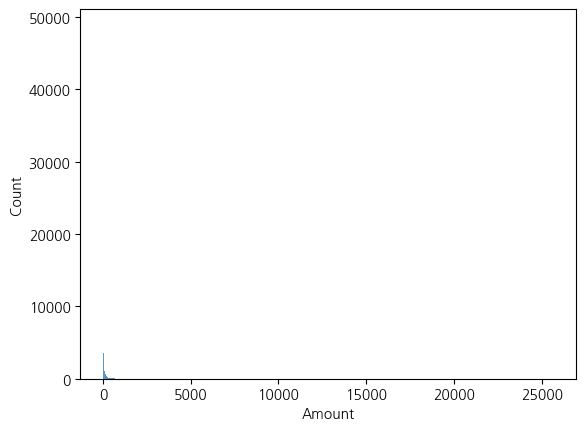

In [10]:
sns.histplot(data['Amount'])

In [14]:
X = data.drop('Class',axis=1)
y = data['Class']

In [12]:
from sklearn.preprocessing import RobustScaler

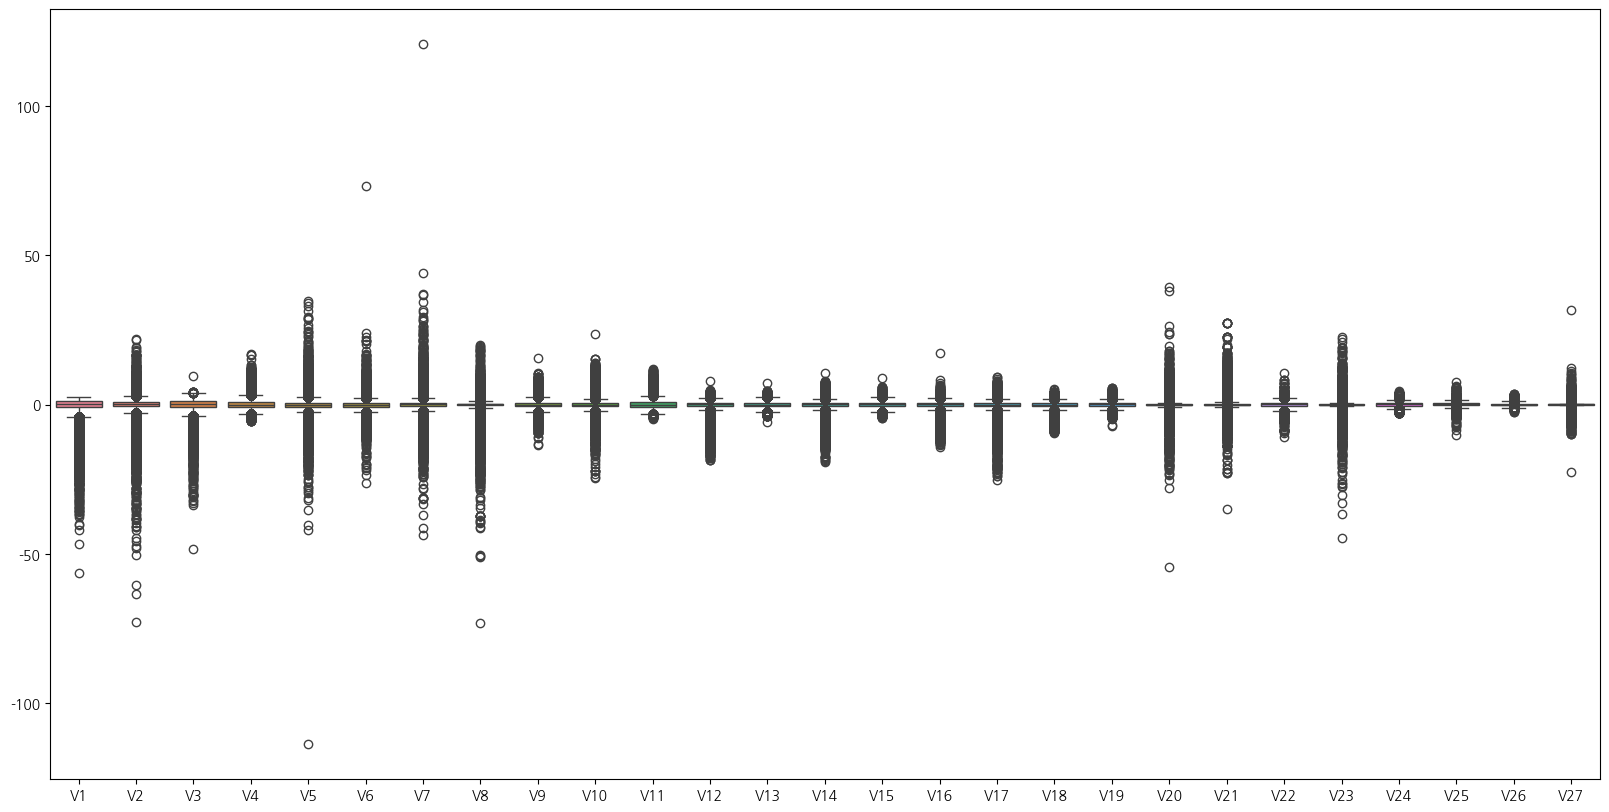

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(X.iloc[:,1:-2])
plt.show()

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

Time        V1        V2        V3        V4        V5        V6  \
0      -0.994983 -0.616237 -0.098602  1.228905  0.878152 -0.217859  0.631245   
1      -0.994983  0.524929  0.143100 -0.006970  0.293974  0.087726  0.164395   
2      -0.994972 -0.615587 -1.002407  0.830932  0.251024 -0.344345  1.778007   
3      -0.994972 -0.440239 -0.178789  0.841250 -0.529808  0.033775  1.303832   
4      -0.994960 -0.526089  0.579239  0.713861  0.265632 -0.270695  0.317183   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.034951 -5.321622  7.135767 -5.222589 -1.285699 -4.073679 -1.999082   
284803  1.034963 -0.335820 -0.085979  0.967471 -0.451476  0.707747  1.142041   
284804  1.034975  0.850377 -0.261532 -1.788463 -0.337932  2.059687  2.832770   
284805  1.034975 -0.115629  0.331602  0.272567  0.445763 -0.248270  0.769496   
284806  1.035022 -0.246654 -0.182004  0.272998 -0.305547  0.032059 -0.321743   

              V7         V8        V9  ...       V20       V21       V22  \
0       0.177406   0.142432  0.334787  ...  0.910463  0.026866  0.253109   
1      -0.105740   0.117064 -0.164482  ... -0.019150 -0.473332 -0.602719   
2       0.668164   0.420388 -1.179796  ...  1.703959  0.668917  0.714254   
3       0.175637   0.662489 -1.076888  ... -0.422194 -0.190105 -0.001408   
4       0.491625  -0.546463  0.700808  ...  1.366227  0.048266  0.739092   
...          ...        ...       ...  ...       ...       ...       ...   
284802 -4.409307  13.588260  1.585066  ...  4.461946  0.585633  0.098124   
284803 -0.014027   0.508439  0.512990  ...  0.354148  0.587444  0.856848   
284804 -0.299623   1.280019  0.390154  ...  0.185279  0.630455  0.533612   
284805 -0.645865   1.225405  0.357606  ...  0.550857  0.710499  0.740745   
284806  1.366729  -0.815351  0.433472  ...  1.291990  0.700403  0.594168   

             V23       V24       V25       V26       V27       V28    Amount  
0      -0.320791  0.032681  0.167619 -0.241182  0.816731 -0.246091  1.783274  
1       0.363442 -0.479557  0.225462  0.313475 -0.063781  0.026519 -0.269825  
2       2.974603 -0.919589 -0.515430 -0.153111 -0.350218 -0.540962  4.983721  
3      -0.578786 -1.531963  0.944482 -0.298959  0.379163  0.382611  1.418291  
4      -0.407980  0.126293 -0.333308  0.976221  1.347133  1.553716  0.670579  
...          ...       ...       ...       ...       ...       ...       ...  
284802  3.314091 -0.693006  2.126512  0.532055  5.820867  6.190862 -0.296653  
284803  0.076436 -1.331299 -0.933155 -0.604145  0.414680 -0.493534  0.038986  
284804 -0.085005  0.754500  0.373060 -0.062034  0.019227 -0.288058  0.641096  
284805 -0.491472  0.103549 -0.877058  1.054357  0.663921  0.710829 -0.167680  
284806  1.253585 -0.040522 -0.734049 -1.348969 -0.023211  0.018326  2.724796  

[284807 rows x 30 columns]

<Axes: >

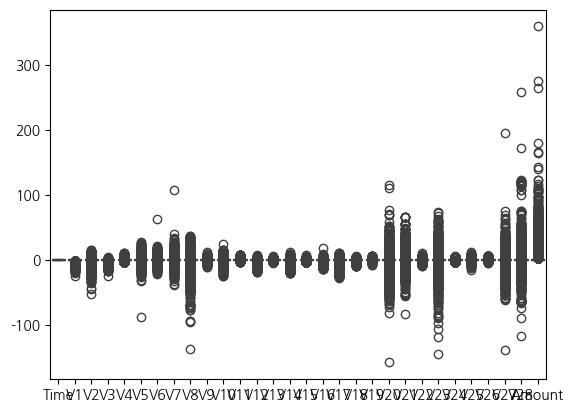

In [19]:
sns.boxplot(X_scaled)

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [25]:
xgb = XGBClassifier(max_depth=5, n_estimators=500, n_job=-1, random_state=10)
xgb.fit(X_train, y_train)
valid_pred = xgb.predict(X_valid)
print(classification_report(y_valid, valid_pred))
print(roc_auc_score(y_valid, valid_pred))
print(roc_curve(y_valid, valid_pred))

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [16:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_job" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.80      0.86        98

    accuracy                           1.00     56961
   macro avg       0.97      0.90      0.93     56961
weighted avg       1.00      1.00      1.00     56961

0.897915218353314
(array([0.00000000e+00, 8.79306403e-05, 1.00000000e+00]), array([0.        , 0.79591837, 1.        ]), array([inf,  1.,  0.]))


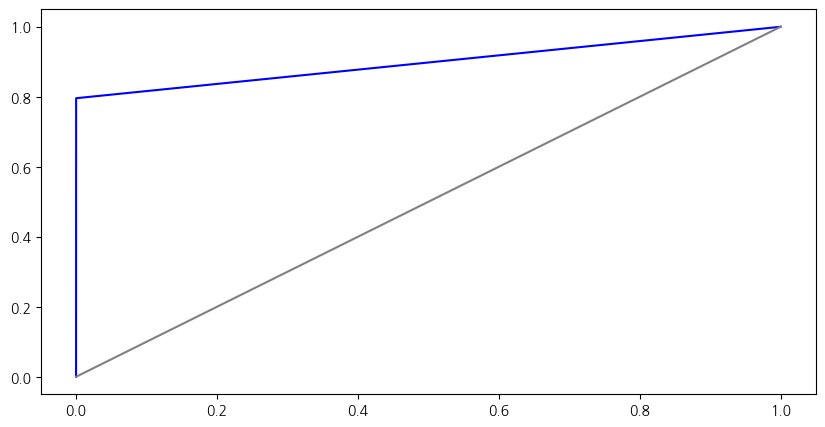

In [26]:
fpr, tpr, _ = roc_curve(y_valid, valid_pred)
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='blue', label = 'ROC Curve')
plt.plot([0,1], [0,1], color='gray')
plt.show()

In [28]:
test_pred = xgb.predict(X_test)
print(classification_report(y_test, test_pred))
print(roc_auc_score(y_test, test_pred))
print(roc_curve(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.86      0.88        99

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962

0.9292137917166495
(array([0.00000000e+00, 1.58275153e-04, 1.00000000e+00]), array([0.        , 0.85858586, 1.        ]), array([inf,  1.,  0.]))


- 일반화 성능을 올리기 위해서 stratified-kfold와 gridsearch로 하이퍼파라미터 탐색

In [29]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [30]:
skf = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

In [31]:
params = dict(max_depth = [3,5,7,9], n_estimators=[100, 300, 500, 1000], subsample=[0.6, 0.8, 1.0],
             n_jobs=[-1], random_state=[10])

In [33]:
grid_cv = GridSearchCV(XGBClassifier(), param_grid=params, cv = skf, scoring='roc_auc', n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('best parameters : ', grid_cv.best_params_)
best_model = grid_cv.best_estimator_

best parameters :  {'max_depth': 5, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 10, 'subsample': 0.6}


In [35]:
best_pred = best_model.predict(X_test)
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.82      0.87        99

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [36]:
print(roc_auc_score(y_test, best_pred))

0.9090293576426915


# 데이터 증폭 및 여러 개의 모델을 pipeline으로 연결해 성능 비교 분석

In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

- 파이프라인을 위한 모델 설정

In [64]:
models = dict(XGB=XGBClassifier(n_jobs=-1, random_state=10),
              RFC=RandomForestClassifier(n_jobs=-1, random_state=10),
              LGBM=LGBMClassifier(n_jobs=-1, random_state=10))
models

{'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, random_state=10, ...),
 'RFC': RandomForestClassifier(n_jobs=-1, random_state=10),
 'LGBM': LGBMClassifier(n_jobs=-1, random_state=10)}

- 각 모델의 하이퍼파라미터 설정

In [65]:
params = {
    'XGB': {
        'smote__sampling_strategy': [0.1, 0.25, 0.5, 0.75, 1.0],
        'model__max_depth': [3, 5, 7, 9],
        'model__n_estimators': [100, 300, 500],
        'model__subsample': [0.6, 0.8, 1.0]
    },
    'RFC': {
        'smote__sampling_strategy': [0.1, 0.25, 0.5, 0.75, 1.0],
        'model__max_depth': [3, 5, 7, 9],
        'model__n_estimators': [100, 300, 500]
    },
    'LGBM': {
        'smote__sampling_strategy': [0.1, 0.25, 0.5, 0.75, 1.0],
        'model__max_depth': [3, 5, 7, 9],
        'model__n_estimators': [100, 300, 500],
        'model__subsample': [0.6, 0.8, 1.0]
    }
}


In [66]:
# 각 모델별로 최적의 파라미터 찾고 성능 평가
best_estimators = {}
roc_auc_scores = {}
classification_reports = {}

In [67]:
for model_name, model in models.items():
    print(model_name, model)
    
    # SMOTE + 파이프라인
    pipeline = imb_make_pipeline(SMOTE(random_state=10), ('model', model))

    # GridSearch 설정
    grid_cv = GridSearchCV(pipeline, param_grid=params[model_name], 
                           cv=skf, scoring='roc_auc', return_train_score=True, n_jobs=-1, verbose=2)

    grid_cv.fit(X_train, y_train)

    # 최적 모델 저장
    best_estimators[model_name] = grid_cv.best_estimator_
    print(f'{model_name}_best params', grid_cv.best_params_)

    # 테스트 데이터 평가
    y_test_pred = grid_cv.best_estimator_.predict(X_test)
    y_test_pred_proba = grid_cv.best_estimator_.predict_proba(X_test)[:, 1]

    # roc_auc 점수 계산
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    roc_auc_scores[model_name] = roc_auc

    # classification_report 생성
    report = classification_report(y_test, y_test_pred, output_dict=True)
    classification_reports[model_name] = report

    print(f'\n{model_name} - ROC AUC : {roc_auc:.4f}')
    print(f'classification_report {model_name}: \n', report)

XGB XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=10, ...)
Fitting 5 folds for each of 180 candidates, totalling 900 fits


ValueError: Invalid parameter 'model' for estimator Pipeline(steps=[('smote', SMOTE(random_state=10)),
                ('tuple',
                 ('model',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, device=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None,
                                learning_rate=None, max_bin=None,
                                max_cat_threshold=None, max_cat_to_onehot=None,
                                max_delta_step=None, max_depth=None,
                                max_leaves=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                multi_strategy=None, n_estimators=None,
                                n_jobs=-1, num_parallel_tree=None,
                                random_state=10, ...)))]). Valid parameters are: ['memory', 'steps', 'verbose'].